# QPong tutorial
In this tutorial, you will learn how to make the core features of QPong.
1. Build a circuit grid model
1. Add gates
1. Generate OpenQASM string
1. Send over to Qiskit, convert to QuantumCircuit object
1. Visulize paddle before and after measurement

## Import pakcages

In [1]:
import sys
sys.path.append('/Users/kirais/Documents/GitHub/Qiskit-for-GameDev/pygame/')

In [2]:
from qgame import CircuitGridModel, CircuitGridNode
from qgame import circuit_node_types as node_types

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
from qiskit import QuantumCircuit

## Initialize circuit grid
circuit_grid_model is a grid of quantum gates with defined number of qubits and circuit depth
(Add a picture of circuit grid from QPong)

In [4]:
circuit_grid_model = CircuitGridModel(qubit_count=3, circuit_depth=6)
print(circuit_grid_model)

CircuitGridModel: 
e, e, e, e, e, e, 
e, e, e, e, e, e, 
e, e, e, e, e, e, 


OpenQASM code can be generated by calling `create_qasm_for_circuit()`

In [5]:
qasm_str = circuit_grid_model.create_qasm_for_circuit()
print(qasm_str)

OPENQASM 2.0;include "qelib1.inc";qreg q[3];creg c[3];id q;


OpenQASM code can then be converted to a `QuantumCircuit` object in Qiskit. 

If the game engine doesn't use Python (e.g. Unity), `qasm_str` can be sent via HTTP to a Flask server hosting Qiskit locally or on the cloud.

In [6]:
circuit = QuantumCircuit.from_qasm_str(qasm_str)
circuit.draw()

## Add gates

### X gate

In [7]:
print(CircuitGridNode(node_types.X))

add r
type: rx, theta: 0


In [8]:
circuit_grid_model.set_node(qubit_index=1,depth_index=0,circuit_grid_node=CircuitGridNode(node_types.X))
print(circuit_grid_model)

add r
CircuitGridModel: 
e, e, e, e, e, e, 
rx, e, e, e, e, e, 
e, e, e, e, e, e, 


In [9]:
qasm_str = circuit_grid_model.create_qasm_for_circuit()
print(qasm_str)

OPENQASM 2.0;include "qelib1.inc";qreg q[3];creg c[3];id q;rx(0) q[1];


In [10]:
circuit = QuantumCircuit.from_qasm_str(qasm_str)
circuit.draw()

In [11]:
circuit_grid_model.set_node(0,1,CircuitGridNode(node_types.H))
circuit_grid_model.set_node(2,1,CircuitGridNode(node_types.H))
print(circuit_grid_model)

CircuitGridModel: 
e, h, e, e, e, e, 
rx, e, e, e, e, e, 
e, h, e, e, e, e, 


In [12]:
qasm_str = circuit_grid_model.create_qasm_for_circuit()
print(qasm_str)
circuit = QuantumCircuit.from_qasm_str(qasm_str)
circuit.draw()

OPENQASM 2.0;include "qelib1.inc";qreg q[3];creg c[3];id q;rx(0) q[1];h q[0];h q[2];


## Before measurement

In [13]:
from qiskit import BasicAer, execute, ClassicalRegister

In [14]:
def paddle_before_measurement(circuit, qubit_num, shot_num):
        backend_sv_sim = BasicAer.get_backend('statevector_simulator')
        job_sim = execute(circuit, backend_sv_sim, shots=shot_num)
        result_sim = job_sim.result()
        state = result_sim.get_statevector(circuit, decimals=3)
        probability = (state*state).real
        return probability

In [15]:
probability = paddle_before_measurement(circuit, 3, 1000)
print(probability)

[0.25 0.25 0.   0.   0.25 0.25 0.   0.  ]


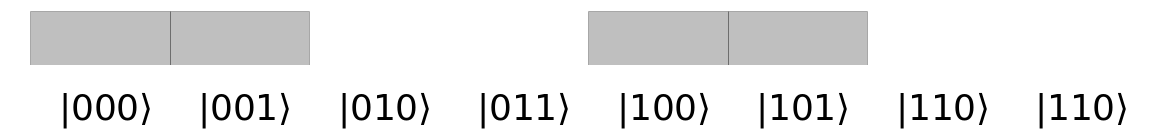

In [20]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
plt.figure(figsize=(20,1))
ax = plt.gca()
for i in range(8):
    ax.add_patch(Rectangle((i/8, 0), 1/8, 1, alpha=probability[i], fc='k', ec='k'))

# add statvector labels
ax.text(0/8+1/40,-1,r"$\left|000\right\rangle$", fontsize=36)
ax.text(1/8+1/40,-1,r"$\left|001\right\rangle$", fontsize=36)
ax.text(2/8+1/40,-1,r"$\left|010\right\rangle$", fontsize=36)
ax.text(3/8+1/40,-1,r"$\left|011\right\rangle$", fontsize=36)
ax.text(4/8+1/40,-1,r"$\left|100\right\rangle$", fontsize=36)
ax.text(5/8+1/40,-1,r"$\left|101\right\rangle$", fontsize=36)
ax.text(6/8+1/40,-1,r"$\left|110\right\rangle$", fontsize=36)
ax.text(7/8+1/40,-1,r"$\left|110\right\rangle$", fontsize=36)
plt.axis('off')
plt.show()

## After measurement

In [21]:
from copy import deepcopy
def paddle_after_measurement(circuit, qubit_num, shot_num):
        backend_sv_sim = BasicAer.get_backend('qasm_simulator')
        circuit.measure(circuit.qregs[0], circuit.cregs[0])
        job_sim = execute(circuit, backend_sv_sim, shots=shot_num)
        result_sim = job_sim.result()
        counts = result_sim.get_counts(circuit)
        
        return int(list(counts.keys())[0], 2)

In [22]:
result = paddle_after_measurement(circuit, 3, 100)
print(result)

4


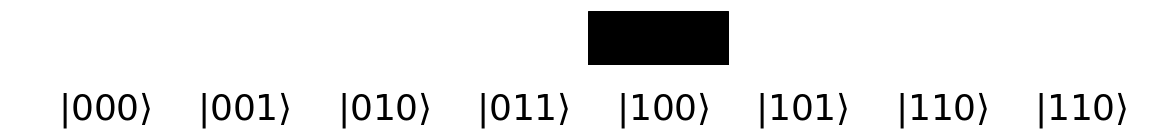

In [23]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
plt.figure(figsize=(20,1))
ax = plt.gca()
for i in range(8):
    if i == result:
        ax.add_patch(Rectangle((i/8, 0), 1/8, 1, alpha=1, fc='k', ec='k'))
    else:
        ax.add_patch(Rectangle((i/8, 0), 1/8, 1, alpha=0, fc='k', ec='k'))

# add statvector labels
ax.text(0/8+1/40,-1,r"$\left|000\right\rangle$", fontsize=36)
ax.text(1/8+1/40,-1,r"$\left|001\right\rangle$", fontsize=36)
ax.text(2/8+1/40,-1,r"$\left|010\right\rangle$", fontsize=36)
ax.text(3/8+1/40,-1,r"$\left|011\right\rangle$", fontsize=36)
ax.text(4/8+1/40,-1,r"$\left|100\right\rangle$", fontsize=36)
ax.text(5/8+1/40,-1,r"$\left|101\right\rangle$", fontsize=36)
ax.text(6/8+1/40,-1,r"$\left|110\right\rangle$", fontsize=36)
ax.text(7/8+1/40,-1,r"$\left|110\right\rangle$", fontsize=36)
plt.axis('off')
plt.show()